## 1. 定义结构元素
形态学处理的核心就是定义结构元素，在OpenCV中，可以使用其自带的getStructuringElement函数，也可以直接使用NumPy的ndarray来定义一个结构元素。首先来看用getStructuringElement函数定义一个结构元素：

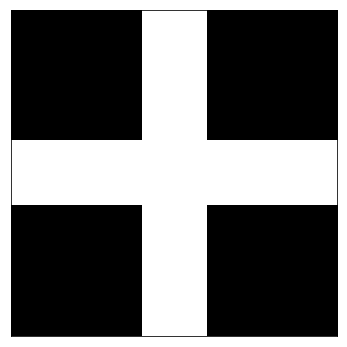

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 6.0)

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
plt.imshow(element,cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

这就定义了一个5×5的十字形结构元素,还可以用NumPy来定义结构元素，如下：

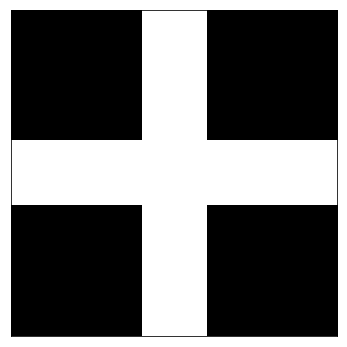

In [15]:
NpKernel = np.uint8(np.zeros((5,5)))
for i in range(5):
    NpKernel[2, i] = 1 
    NpKernel[i, 2] = 1
plt.imshow(NpKernel,cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

这里可以看出，用OpenCV-Python内置的常量定义椭圆（MORPH_ELLIPSE）和十字形结构（MORPH_CROSS）元素要简单一些，如果定义矩形（MORPH_RECT）和自定义结构元素，则两者差不多。

本篇文章将用opencv API的样例图片进行测试

## 2.腐蚀和膨胀
下面先以腐蚀图像为例子介绍如何使用结构元素：

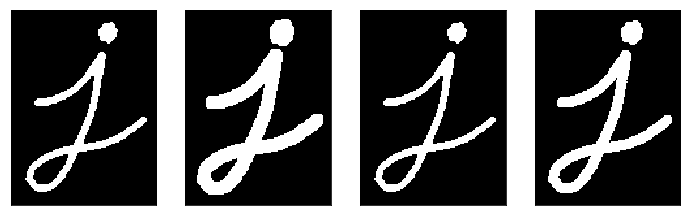

In [16]:
#coding=utf-8
import cv2
import numpy as np
 
img = cv2.imread('./images/i.png',0)
#OpenCV定义的结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
 
#腐蚀图像
eroded = cv2.erode(img,kernel)
#膨胀图像
dilated = cv2.dilate(img,kernel)

#NumPy定义的结构元素
NpKernel = np.uint8(np.ones((3,3)))
Nperoded = cv2.erode(img,NpKernel)

imgs = [eroded,dilated,Nperoded,img]

for index,img in enumerate(imgs):
    plt.subplot(1,4,index+1)
    plt.imshow(img,cmap="gray")
    plt.xticks([])
    plt.yticks([])

以上四张图从左至右依次为腐蚀效果、膨胀效果、NumPy定义的结构元素、原图

## 3.开运算和闭运算
开运算和闭运算就是将腐蚀和膨胀按照一定的次序进行处理。但这两者并不是可逆的，即先开后闭并不能得到原先的图像

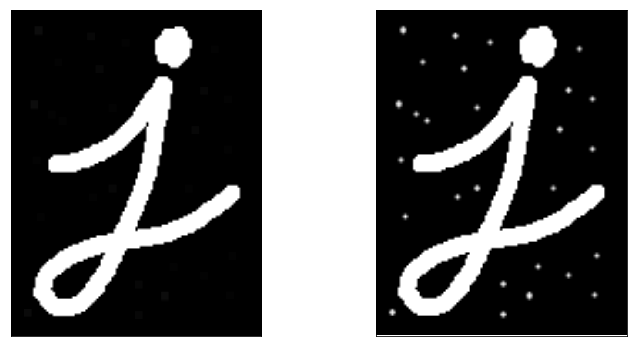

In [17]:
#coding=utf-8
import cv2
import numpy as np
 
img = cv2.imread('./images/i_open.png',0)
#定义结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(16, 16))
 
#开运算
opened = cv2.morphologyEx(img,cv2.MORPH_OPEN, kernel)

imgs = [opened,img]

for index,img in enumerate(imgs):
    plt.subplot(1,2,index+1)
    plt.imshow(img,cmap="gray")
    plt.xticks([])
    plt.yticks([])

以上两张图片，左边图像为开运算处理之后的结果，右图为原图像

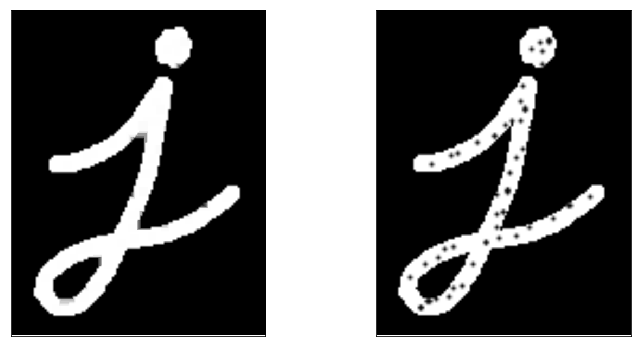

In [18]:
#coding=utf-8
import cv2
import numpy as np
 
img = cv2.imread('./images/i_close.png',0)
#定义结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(16, 16))
 
#闭运算
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

imgs = [closed,img]

for index,img in enumerate(imgs):
    plt.subplot(1,2,index+1)
    plt.imshow(img,cmap="gray")
    plt.xticks([])
    plt.yticks([])

以上右边图像为闭运算处理后的结果，左图为原图像

闭运算用来连接被误分为许多小块的对象，而开运算用于移除由图像噪音形成的斑点。因此，某些情况下可以连续运用这两种运算。如对一副二值图连续使用闭运算和开运算，将获得图像中的主要对象。同样，如果想消除图像中的噪声（即图像中的“小点”），也可以对图像先用开运算后用闭运算，不过这样也会消除一些破碎的对象。